In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataSet=pd.read_csv('../input_data/data.csv').drop(['Serial No.'],axis=1)

In [3]:
trainingData=dataSet.sample(frac=0.8,random_state=100)
validationData=dataSet.drop(trainingData.index)
trainingLabel=trainingData.pop('Chance of Admit ')
validationLabel=validationData.pop('Chance of Admit ')

In [4]:
X_Train=np.array(trainingData)
X_Train=(X_Train-X_Train.mean(axis=0))/X_Train.std(axis=0)
Y_Train=np.array(trainingLabel).reshape((len(trainingLabel),1))

X_Test=np.array(validationData)
X_Test=(X_Test-X_Test.mean(axis=0))/X_Test.std(axis=0)
Y_Test=np.array(validationLabel).reshape((len(validationLabel),1))

In [5]:
class RidgeRegression():
    
    def __init__(self,alpha,lamda,epochs):
        self.alpha=alpha
        self.lamda=lamda
        self.epochs=epochs
        
    def Cost(self,X,Y):
        X_theta=np.dot(X,self.theta)+self.bias
        return (0.5/len(X))*(np.sum((X_theta-Y)**2)+self.lamda*np.sum(self.theta**2))
    
    def MSE(self,X,Y):
        X_theta=np.dot(X,self.theta)+self.bias
        return (0.5/len(X))*(np.sum((X_theta-Y)**2))
    
    def GD(self,X,Y):
        theta=np.zeros((X.shape[1],1))
        bias=1
        for e in range(self.epochs):
            X_theta=np.dot(X,theta)+bias
            dBias=np.sum(X_theta-Y)
            regularizedTerm=np.dot(X.T,(X_theta-Y))+self.lamda*theta
            bias=bias-(self.alpha/len(X)*dBias)
            theta=theta-(self.alpha/len(X)*regularizedTerm)
        return theta,bias
    
    def fit(self,X,Y):
        self.theta,self.bias=self.GD(X,Y)
    
    def predict(self,X,Y):
        return np.dot(X,self.theta)+self.bias

In [6]:
lambdas=np.arange(0,25,1)
trainErrors=[]
testErrors=[]
for lamda in lambdas:
    model=RidgeRegression(alpha=0.1,lamda=lamda,epochs=1000)
    model.fit(X_Train,Y_Train)
    trainErrors.append(model.MSE(X_Train,Y_Train))
    testErrors.append(model.MSE(X_Test,Y_Test))

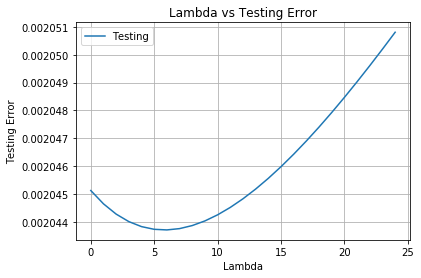

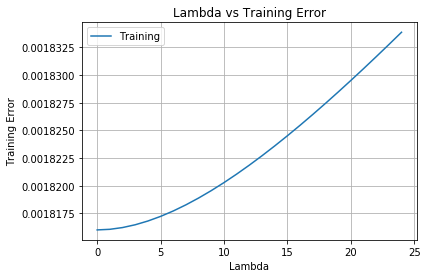

In [7]:
plt.plot(lambdas,testErrors,label="Testing")
plt.title('Lambda vs Testing Error')
plt.xlabel('Lambda')
plt.grid(True)
plt.ylabel('Testing Error')
plt.legend()
plt.show()

plt.figure()
plt.plot(lambdas,trainErrors,label="Training")
plt.title('Lambda vs Training Error')
plt.xlabel('Lambda')
plt.grid(True)
plt.ylabel('Training Error')
plt.legend()
plt.show()